In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e5/sample_submission.csv
/kaggle/input/playground-series-s3e5/train.csv
/kaggle/input/playground-series-s3e5/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e5/test.csv')

In [3]:
train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [5]:
train.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1027.500000,8.365175,0.527601,0.265058,2.398881,0.081856,16.955982,49.236868,0.996748,3.310569,0.641308,10.414972,5.720817
std,593.660397,1.705390,0.173164,0.188267,0.858824,0.023729,10.009710,32.961141,0.001827,0.142321,0.137942,1.028825,0.853146
min,0.000000,5.000000,0.180000,0.000000,1.200000,0.012000,1.000000,7.000000,0.990070,2.740000,0.390000,8.700000,3.000000
25%,513.750000,7.200000,0.390000,0.090000,1.900000,0.071000,8.000000,22.000000,0.995600,3.200000,0.550000,9.500000,5.000000
50%,1027.500000,7.950000,0.520000,0.250000,2.200000,0.079000,16.000000,44.000000,0.996700,3.310000,0.610000,10.100000,6.000000
75%,1541.250000,9.200000,0.640000,0.420000,2.600000,0.090000,24.000000,65.000000,0.997800,3.390000,0.720000,11.000000,6.000000
max,2055.000000,15.900000,1.580000,0.760000,14.000000,0.414000,68.000000,289.000000,1.003690,3.780000,1.950000,14.000000,8.000000


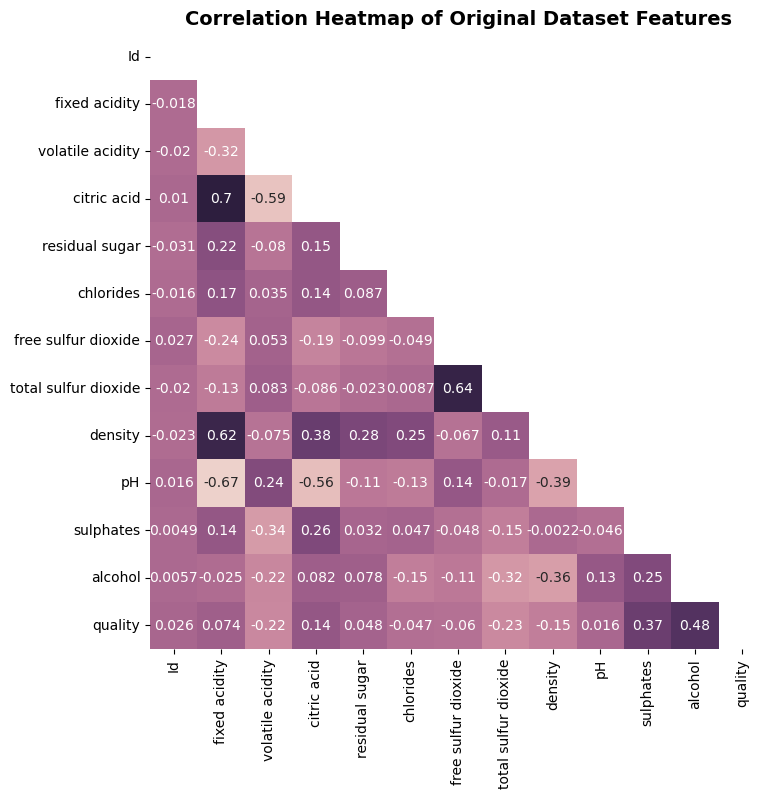

In [6]:
corr_matrix = train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, square=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False)
plt.title("Correlation Heatmap of Original Dataset Features", weight = 'bold', size = 14)
plt.show()

/tmp/ipykernel_20/563328263.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x=features[i], y=features[i + 1], ax=ax, palette=c)
/tmp/ipykernel_20/563328263.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x=features[i], y=features[i + 1], ax=ax, palette=c)
/tmp/ipykernel_20/563328263.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x=features[i], y=features[i + 1], ax=ax, palette=c)
/tmp/ipykernel_20/563328263.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x=features[i], y=features[i + 1], ax=ax, palette=c)
/tmp/ipykernel_20/563328263.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x=features[i], y=features[i + 1], ax=ax, palette=c)
/tmp/ipykernel_20/563328263.py

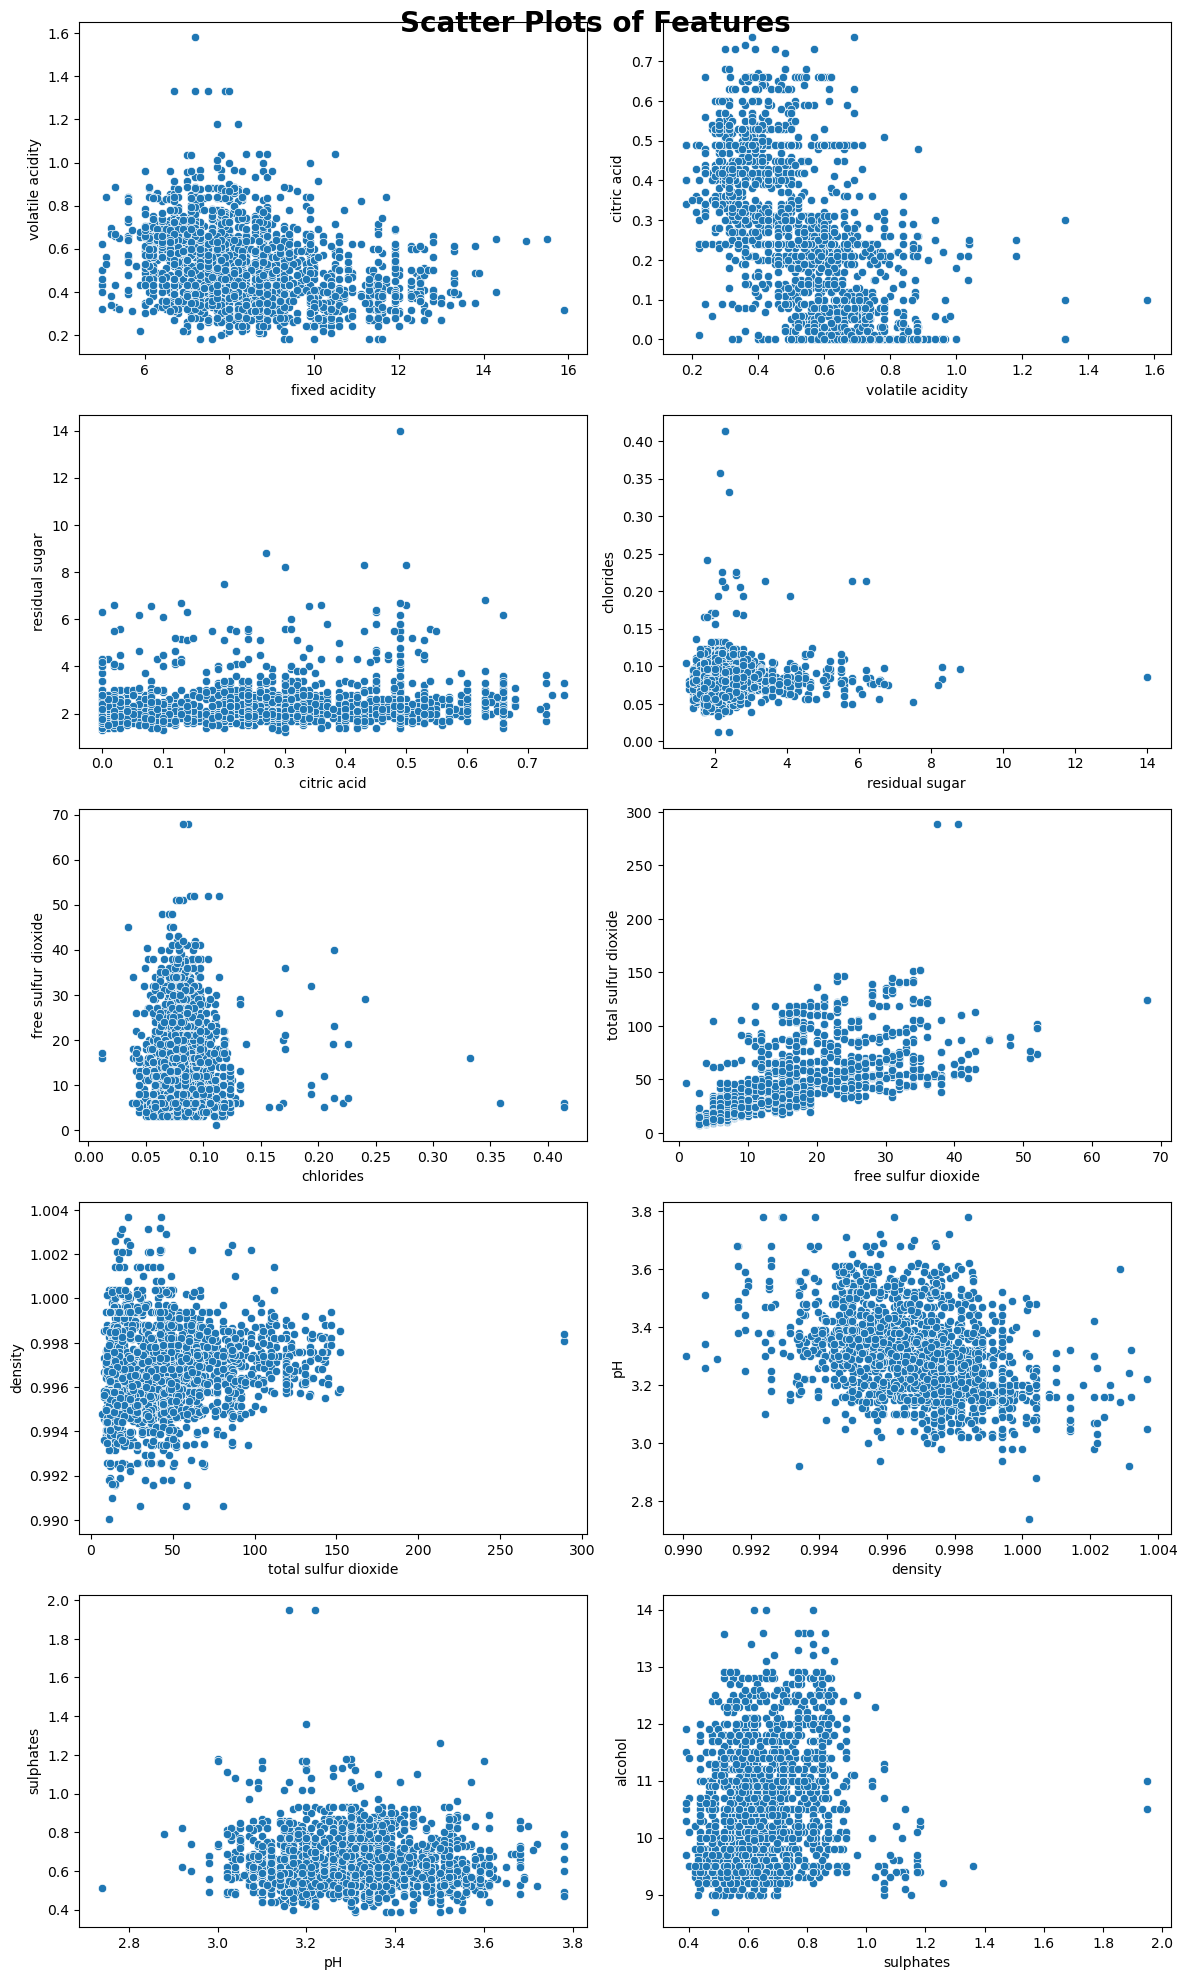

In [7]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

fig = plt.figure(figsize=(12, len(features)//2 * 5))

c = ['#EC5B6D', '#6ca957', '#037d97']

# scatter plots for each pair of features
for i in range(len(features) - 1):
    ax = fig.add_subplot(len(features)//2 + len(features)%2, 2, i+1)

    sns.scatterplot(data=train, x=features[i], y=features[i + 1], ax=ax, palette=c)
    ax.set_xlabel(features[i])
    ax.set_ylabel(features[i + 1])

fig.suptitle(f'Scatter Plots of Features\n\n\n\n', ha='center', fontweight='bold', fontsize=20, y=0.93)
plt.tight_layout()
plt.show()

/tmp/ipykernel_20/2346018989.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x=features[i], y=train['quality'], ax=ax, palette=c) #hue=original['Sex']
/tmp/ipykernel_20/2346018989.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x=features[i], y=train['quality'], ax=ax, palette=c) #hue=original['Sex']
/tmp/ipykernel_20/2346018989.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x=features[i], y=train['quality'], ax=ax, palette=c) #hue=original['Sex']
/tmp/ipykernel_20/2346018989.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train, x=features[i], y=train['quality'], ax=ax, palette=c) #hue=original['Sex']
/tmp/ipykernel_20/2346018989.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=t

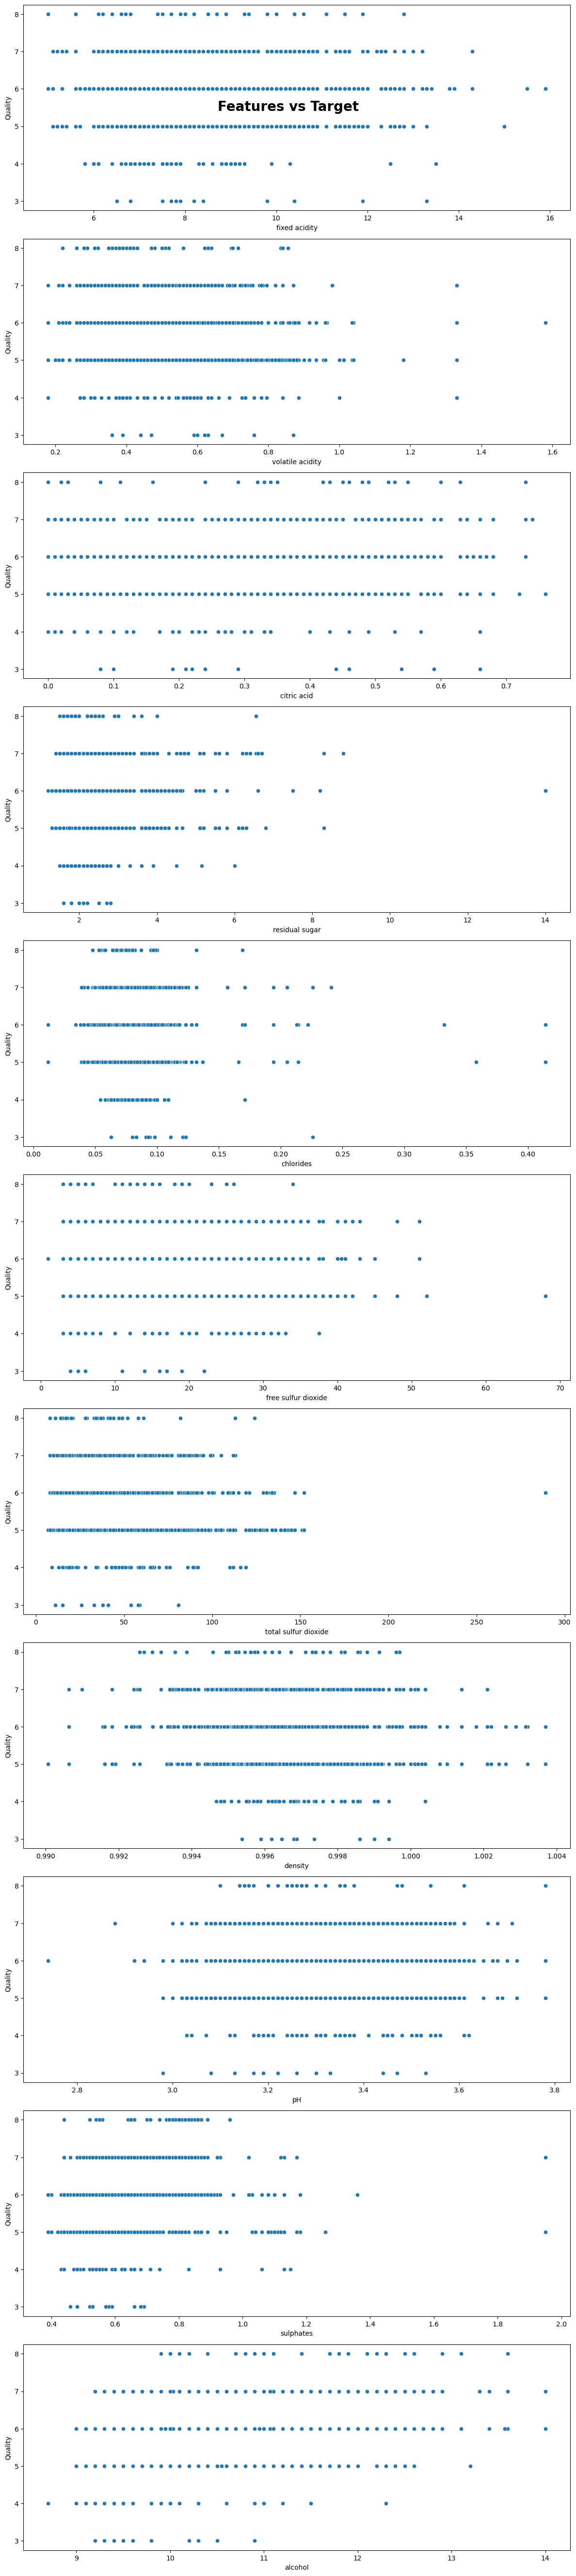

In [8]:

fig = plt.figure(figsize=(12, len(features) * 5))

c = ['#EC5B6D', '#6ca957', '#037d97']

for i in range(len(features)):
    ax = fig.add_subplot(len(features), 1, i+1)

    sns.scatterplot(data=train, x=features[i], y=train['quality'], ax=ax, palette=c) #hue=original['Sex']
    ax.set_xlabel(features[i])
    ax.set_ylabel('Quality')

fig.suptitle(f'Features vs Target\n\n\n\n', ha='center', fontweight='bold', fontsize=20, y=0.93)
plt.tight_layout()
plt.show()

In [9]:
#Feature engineering

train['non_free_sulfur_dioxide'] = train['total sulfur dioxide'] - train['free sulfur dioxide']
#train['sweetness'] = train['residual sugar'] / train['density']
train['overall acidity'] = train['fixed acidity'] + train['volatile acidity'] + train['citric acid']
#train['sugar_to_acid_ratio'] = train['residual sugar'] / train['overall acidity']

#train['pH_squared'] = train['pH'] ** 2
#train['alcohol_interaction_ph'] = train['alcohol'] * train['pH']


test['non_free_sulfur_dioxide'] = test['total sulfur dioxide'] - test['free sulfur dioxide']
#test['sweetness'] = test['residual sugar'] / test['density']
test['overall acidity'] = test['fixed acidity'] + test['volatile acidity'] + test['citric acid']
#test['sugar_to_acid_ratio'] = test['residual sugar'] / test['overall acidity']



#test['pH_squared'] = test['pH'] ** 2
#test['alcohol_interaction_ph'] = test['alcohol'] * test['pH']

In [10]:
X_train = train.drop('quality', axis=1)
y_train = train['quality'].copy()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
test_scaled = scaler.transform(test)

In [12]:
import xgboost
xgb = xgboost.XGBRegressor()

In [13]:
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb, X_train_scaled, y_train, cv=cv, scoring=make_scorer(mean_absolute_error))

print(f"Mean Absolute Error (MAE) in Cross Validation: {scores.mean()}")

Mean Absolute Error (MAE) in Cross Validation: 0.581527886112072


In [14]:
xgb.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [15]:
predictions = xgb.predict(X_train_scaled)

In [16]:
from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)
rmse

0.12266328651646984

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
param_distributions = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
                      {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]
for_search_cv = RandomizedSearchCV(xgb, param_distributions,scoring='neg_mean_squared_error', return_train_score=True)
for_search_cv.fit(X_train_scaled, y_train)

[08:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[08:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[08:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[08:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[08:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[08:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

[08:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

[08:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

[08:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

[08:25:42] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

[08:25:42] WARNING: ../src/learner.

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [19]:
final_model = for_search_cv.best_estimator_

In [20]:
final_predictions = final_model.predict(test_scaled)

In [21]:
final_predictions = final_predictions.round()
final_predictions = final_predictions.astype(int)

In [22]:
final_predictions

array([5, 6, 6, ..., 5, 5, 6])

In [23]:
submission_df = pd.DataFrame({'Id': test['Id'], 'quality': final_predictions})
submission_df.to_csv('submission.csv', index=False)